# Task 1 Predict the percentage of marks of a student based on the number of Study hours(Linear Regression) by Anish Kumar

### Importing the required libraries

In [2]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Exploratory Data Analysis

In [3]:
#importing dataset 
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Therefore we are provided with 2 variables. Hours studied by the student per day and the score received

Lets visualize the data on regression to get a better understanding of the relation betwwen the variables.

D:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


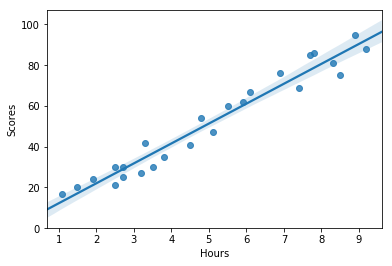

In [4]:
h = df['Hours']
s=df['Scores']
sns.regplot(x=h,y=s)
plt.show()

It is clearly visible that there is a linear variation between the hours studied and score of the student.Furthermore,it is a linearly increasing variation

Lets check to what degree does the independent variable(Score)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


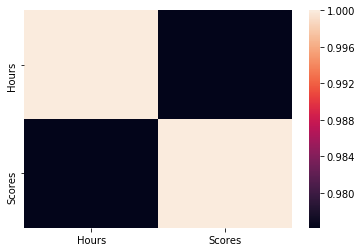

In [5]:
corr_matrix=df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix)
plt.show()

We can see from the correlation coeeficient values, "Hours" and "Score" are strongly related

### Modelling

As the data is in the form of continous variable the best model for prediction is the regression model.From the Scatter plot and correlation values it is evident that simple linear regression would give an accurate prediction.

In [6]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values

### Importing libraries for modelling

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)

In [8]:
# Calling the LinerRegression model and fitting the the training data [Training the Model]
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
print(regressor.intercept_)     #Y-Intercept
print(regressor.coef_)          # Slope of the Line

2.018160041434683
[9.91065648]


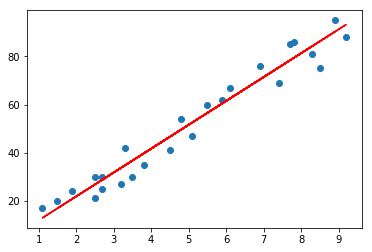

In [9]:
# Plotting the line
l=regressor.coef_*X + regressor.intercept_
plt.scatter(X,Y)
plt.plot(X,l,color='red')
plt.show()

In [10]:
# Predicting the scores
y_pred=regressor.predict(X_test)
dataset=pd.DataFrame({'Actual':Y_test,'Predicted Score':y_pred})
dataset

,Actual,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
print("No. of Hours = ",9.25)
print("Predicted Score =",regressor.predict([[9.25]]) )  

No. of Hours =  9.25
Predicted Score = [93.69173249]


So if a student studies for 9.25 hours then his predicted score would be 93

### Model Analysis

In [12]:
#Coefficient of determination
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.9454906892105356

The value for coefficient of determination is high which means that 94.54% change is observed in the score due to hours studied by the student

In [13]:
from sklearn import metrics
print('MAE : ',metrics.mean_absolute_error(Y_test,y_pred))
print('MSE : ',metrics.mean_squared_error(Y_test,y_pred))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

MAE :  4.183859899002975
MSE :  21.5987693072174
RMSE :  4.6474476121003665


The values of MAE,MSE and RMSE are low, hence the model seems a good fit




# Thank You